## Exploratory Data Analysis of Bank Stocks

This project focuses on **exploratory data analysis of bank stocks** using Python. The analysis covers stock performance from the **financial crisis** up to early 2016.

---

## Objectives

* Practice **data collection** using `pandas-datareader`.
* Perform **time series analysis** on financial data.
* Apply **data visualization techniques** to identify patterns and trends.
* Strengthen overall **data analysis and manipulation skills**.

---

## Tools & Libraries

* **Python**
* **Pandas** – data manipulation and analysis
* **pandas-datareader** – fetching stock data
* **Matplotlib / Seaborn** – data visualization

---

## Get the Data

Stock price data was retrieved using `pandas-datareader` directly from online sources (e.g., Yahoo Finance). This allowed for real-time access to financial datasets and seamless integration into Pandas DataFrames.


### The Imports

* Imported libraries for data analysis and visualization

In [1]:
!pip install pandas-datareader
import seaborn as sns
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

## Data

 collected **historical stock data (2006–2016)** for six major US banks:

- Bank of America  
- CitiGroup  
- Goldman Sachs  
- JPMorgan Chase  
- Morgan Stanley  
- Wells Fargo  

The data was retrieved using **pandas-datareader / yfinance** and stored in Pandas DataFrames.  
This allows us to perform **time series analysis** and compare stock performance before, during, and after the **financial crisis**.


In [2]:
start = dt.datetime(2006,1,1)
end = dt.datetime(2016,1,1)

In [3]:
BAC = yf.download('BAC',start = start,end = end)

C = yf.download('C',start = start,end = end)

GS = yf.download('GS',start = start,end = end)

JPM = yf.download('JPM',start = start,end = end)

MS = yf.download('MS',start = start,end = end)

WFC = yf.download('WFC',start = start,end = end)

C:\Users\R\AppData\Local\Temp\ipykernel_23496\1635545836.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  BAC = yf.download('BAC',start = start,end = end)
[*********************100%***********************]  1 of 1 completed
C:\Users\R\AppData\Local\Temp\ipykernel_23496\1635545836.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  C = yf.download('C',start = start,end = end)
[*********************100%***********************]  1 of 1 completed
C:\Users\R\AppData\Local\Temp\ipykernel_23496\1635545836.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  GS = yf.download('GS',start = start,end = end)
[*********************100%***********************]  1 of 1 completed
C:\Users\R\AppData\Local\Temp\ipykernel_23496\1635545836.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  JPM = yf.download('JPM',start = start,end = end)
[*********************100%*****

*  Create a list of ticker symbols for the selected banks

In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

* Combine all bank DataFrames into one **(bank_stocks)** using tickers as keys

In [5]:
objs = [BAC,C,GS,JPM,MS,WFC]
bank_stocks = pd.concat(objs,axis=1,keys=tickers)

* Check the number of column levels in the dataframe


In [6]:
print(bank_stocks.columns.nlevels)

3


* Drop the third column level to simplify the dataframe


In [7]:
bank_stocks.columns = bank_stocks.columns.droplevel(2)

* Rename the column levels to: Bank Ticker and Stock Info


In [8]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

* Show first rows of the dataframe


In [9]:
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   30.819626  30.885087  30.210827  30.714884  16296700  319.342438   
2006-01-04   30.492306  30.924356  30.407204  30.767246  17757900  313.446625   
2006-01-05   30.531565  30.655944  30.322086  30.492289  14970700  315.001556   
2006-01-06   30.485748  30.708320  30.341731  30.636311  12599800  315.001556   
2006-01-09   30.505400  30.747612  30.348292  30.583956  15619400  313.511414   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   319.925530  311.697404  317.463576  1537600  ...  31.714369   
2006-01-04   318.111403  313.252267  316.556483  1870960  ...  31.736090   
2006-01-05   316.038156  313.576202  313.835352  1143160  ...  31.823132   
2006-01-06   316.815626  312.280433  316.686041  1370210  ...  31.855766   
2006-01-09   315.779010  312.928321  314.871975  1680740  ...  32.192989   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Date                                                                          
2006-01-03   31.812270  30.860458  31.094330  5377000  18.566578  18.610230   
2006-01-04   32.241909  31.736090  31.926453  7977800  18.351236  18.520023   
2006-01-05   31.866644  31.556626  31.844888  5778000  18.330864  18.365785   
2006-01-06   32.008055  31.572942  31.964545  6889800  18.438534  18.493826   
2006-01-09   32.247380  31.882971  31.888411  4144500  18.435627  18.522932   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Date                                         
2006-01-03   18.156251  18.391971  11016400  
2006-01-04   18.255202  18.508382  10870000  
2006-01-05   18.223189  18.333774  10158000  
2006-01-06   18.266837  18.380331   8403800  
2006-01-09   18.365785  18.435627   5619600  

[5 rows x 30 columns]

-----
## Exploratory Data Analysis (EDA)


* calculate the highest closing price for each bank to highlight peak stock performance during the given period.

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     37.271423
C      380.724274
GS     184.167313
JPM     53.088615
MS      49.715740
WFC     43.769436
dtype: float64

 * create a new DataFrame to store the daily returns of each bank’s stock, which will be used to analyze volatility and risk.

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

* Calculate daily returns for each bank using pct_change() on the Close price

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change(fill_method=None)
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010621,-0.018462,-0.013812,-0.005772,0.000685,-0.011598
2006-01-05,0.001288,0.004961,-0.000393,0.003030,0.002743,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001026,0.005874
2006-01-09,0.000645,-0.004731,0.012031,0.016242,0.010586,-0.000158


###  Visualize relationships between bank returns using **seaborn pairplot**

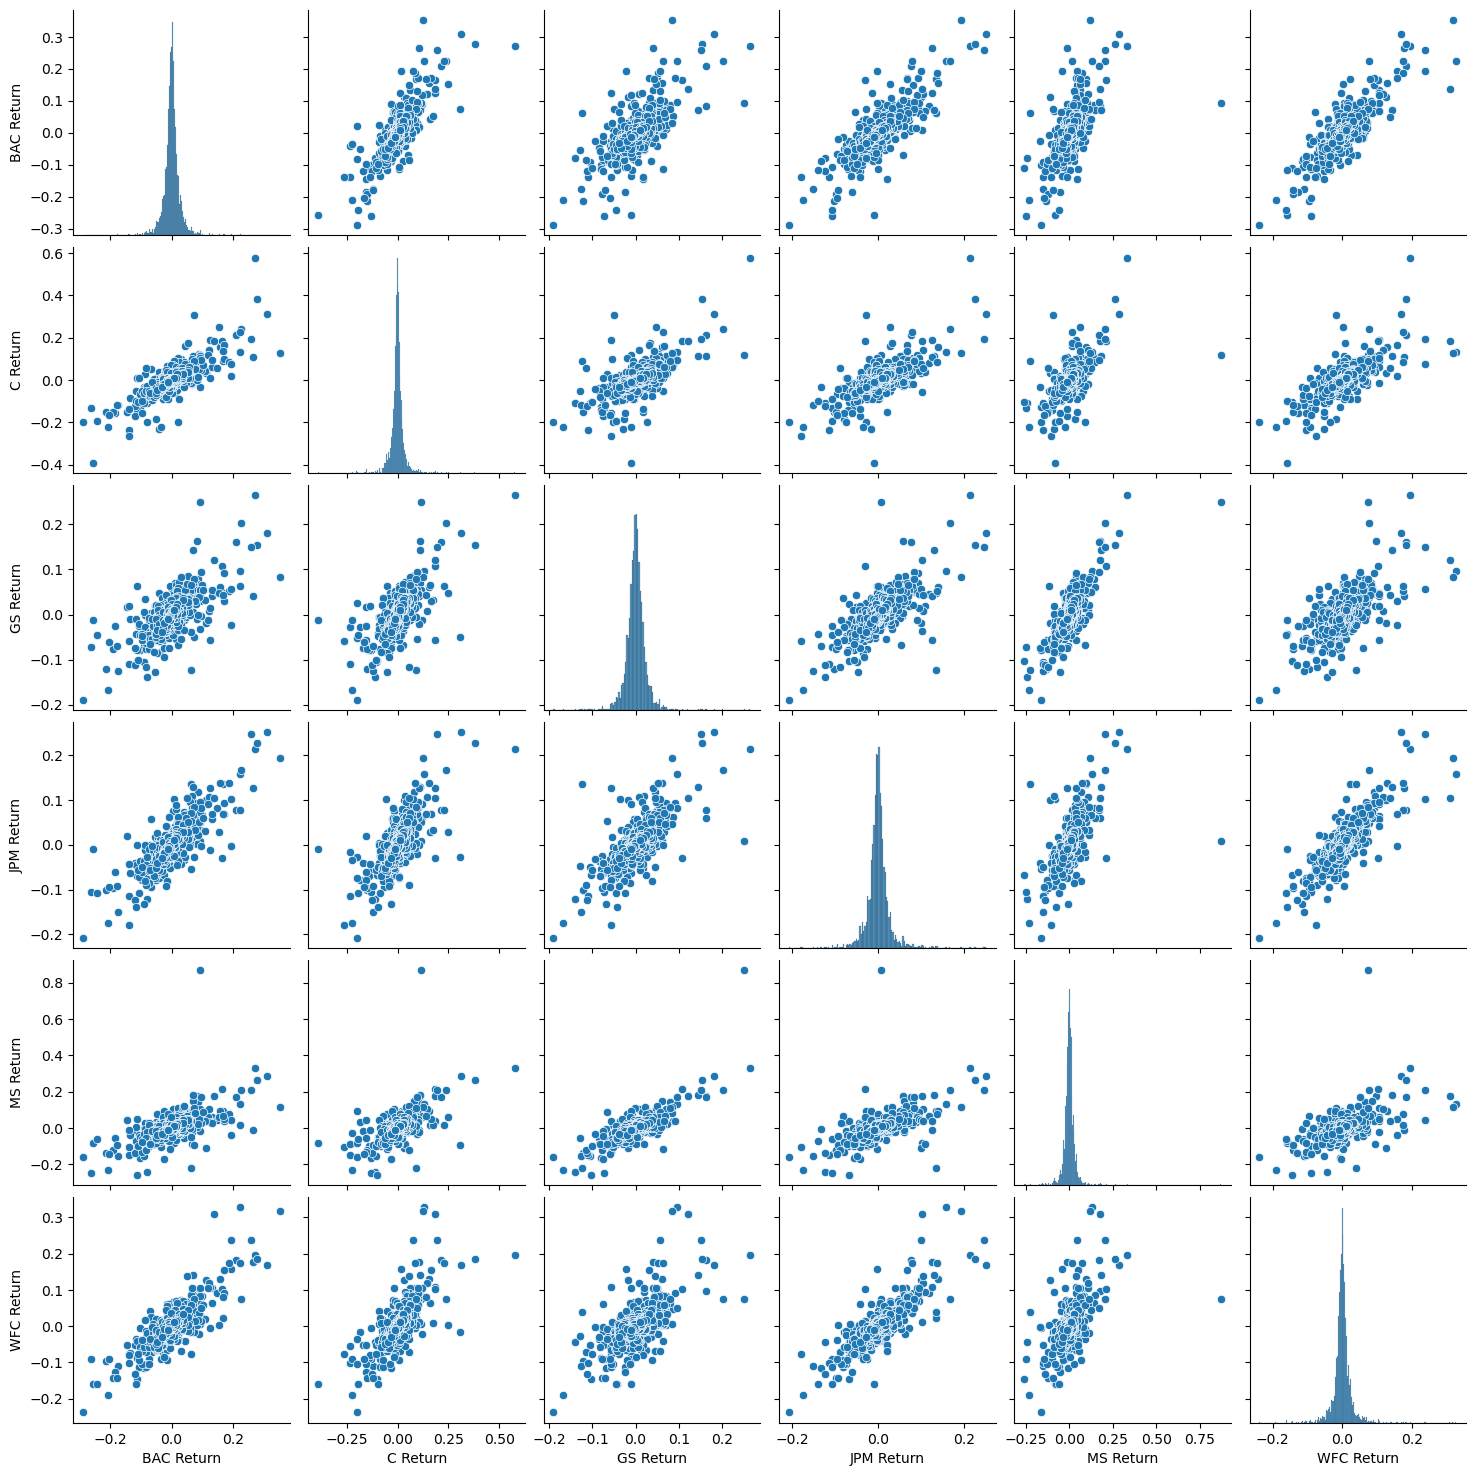

In [13]:
sns.pairplot(returns[1:])
plt.show()

This pairplot shows the **relationships between the daily returns of different banks**.  
We can observe strong positive correlations between most banks, which indicates that their returns often move together.

* Find the **worst single-day** return date for each bank

In [14]:
worst_days=returns.idxmin()
print(worst_days)

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]


* Find the **best single-day** return date for each bank

In [15]:
best_days=returns.idxmax()
print(best_days)

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]


* Calculate **standard deviation** of returns to measure risk for each bank

In [16]:
returns.std()

BAC Return    0.036659
C Return      0.038672
GS Return     0.025386
JPM Return    0.027675
MS Return     0.037717
WFC Return    0.030195
dtype: float64

* Calculate risk **(standard deviation of returns)** for each bank in 2015

In [17]:
# Make sure the index is datetime
returns.index = pd.to_datetime(returns.index)

# Select rows for the year 2015
returns_2015 = returns.loc['2015']

# Compute standard daviation for each stock in 2015
risk_2015 = returns_2015.std()
print(risk_2015)

BAC Return    0.016174
C Return      0.015288
GS Return     0.014043
JPM Return    0.014006
MS Return     0.016287
WFC Return    0.012552
dtype: float64


###  Distribution of Morgan Stanley Daily Returns in 2015


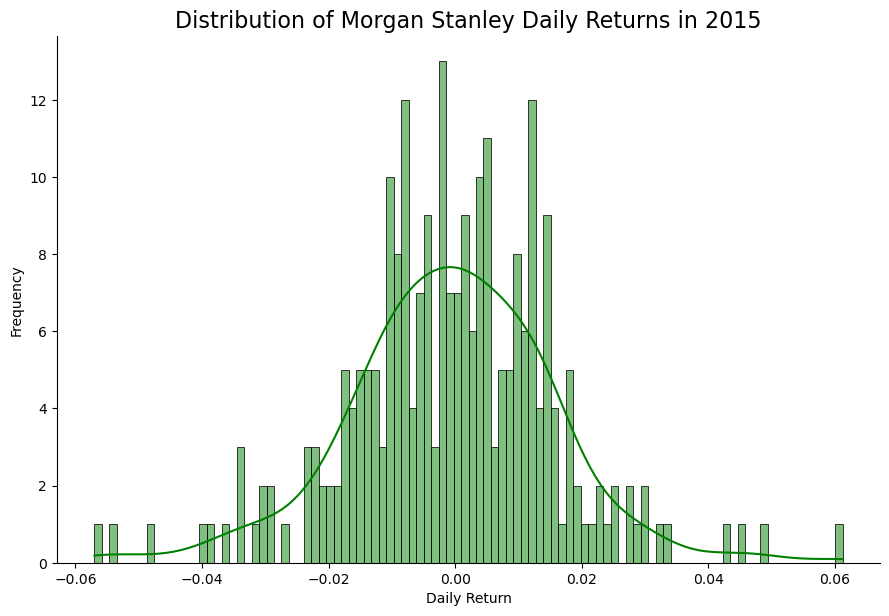

In [18]:
# Convert the index of the DataFrame to datetime
returns.index = pd.to_datetime(returns.index)

# Select 2015 returns for Morgan Stanley
ms_2015 = returns.loc['2015', 'MS Return']

# Plot the distribution using displot
sns.displot(ms_2015, bins=100, kde=True, color='green', height=6, aspect=1.5)

# Add title and axis labels
plt.title('Distribution of Morgan Stanley Daily Returns in 2015', fontsize=16)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

This histogram shows the **distribution of Morgan Stanley’s daily returns in 2015**.  
Most values are centered near zero, but the spread indicates **some volatility throughout the year**.

###  Distribution of Citigroup Daily Returns in 2008

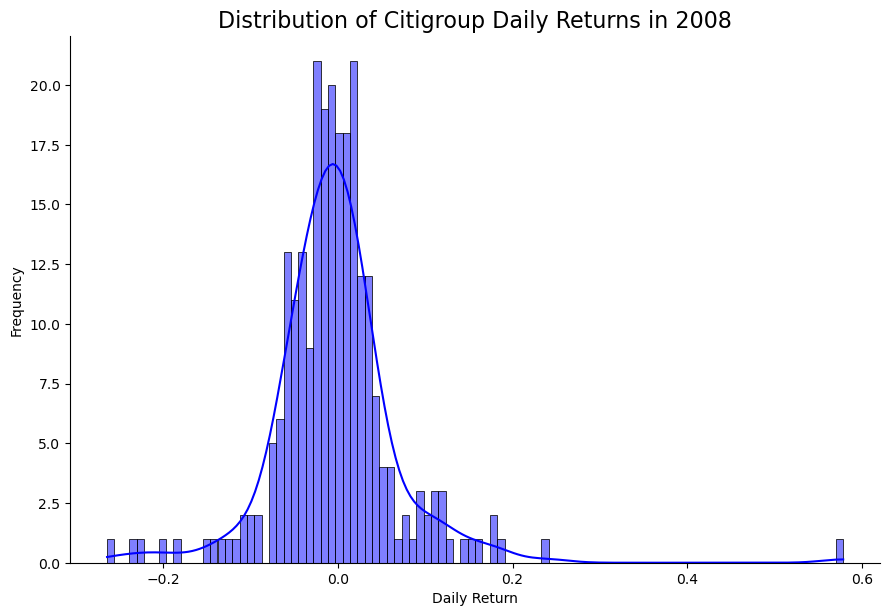

In [19]:
returns.index = pd.to_datetime(returns.index)


citi_2008 = returns.loc['2008', 'C Return']


sns.displot(citi_2008, bins=100, kde=True, color='blue', height=6, aspect=1.5)


plt.title("Distribution of Citigroup Daily Returns in 2008", fontsize=16)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

This histogram shows the **distribution of Citigroup’s daily returns in 2008**.  
We can clearly see **high volatility**, reflecting the **2008 financial crisis impact**.

____
## Visualizations  

In this section, I explored different ways to visualize the stock data using **Matplotlib** and **Seaborn**.  
The goal is to highlight **trends, patterns, and comparisons** across different banks.  

### Imports

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

### Line Plot of Closing Prices for All Banks

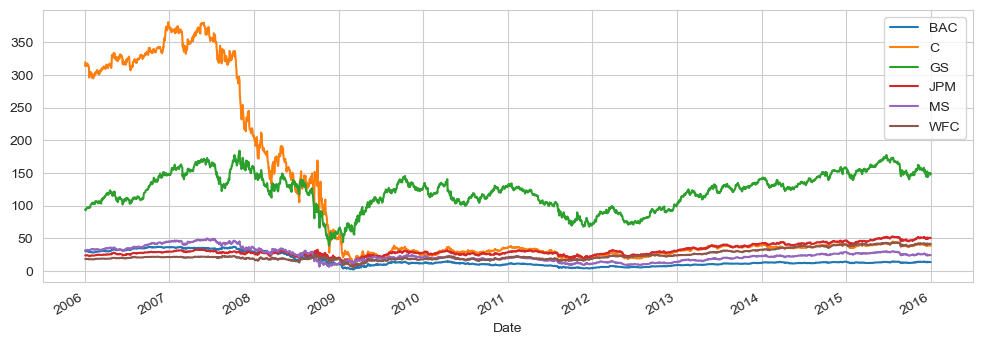

In [21]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
plt.show()

This line plot shows the **closing prices of all banks from 2006 to 2016**.  
It highlights the **2008 financial crisis**, where most banks experienced a sharp decline, followed by a slow recovery.

###  Closing Prices of Bank Stocks (2006–2016)

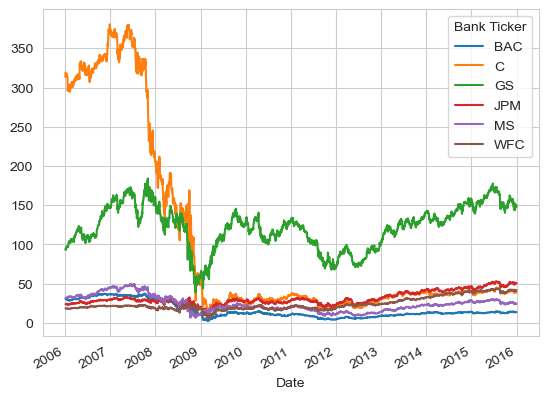

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
plt.show()

This plot highlights the **closing prices of different banks from 2006 to 2016**.  
It clearly shows the **sharp drop of Citigroup (C) during the 2008 financial crisis**, while Goldman Sachs (GS) demonstrates a relatively stronger recovery.

###  Interactive Line Plot of Bank Closing Prices (2006–2016)

In [23]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

C:\Users\R\OneDrive\Documents\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



This interactive plot shows the **closing prices of all banks from 2006 to 2016**.  
It allows zooming and hovering to explore **trends during and after the 2008 crisis**.

## Moving Averages

###  Bank of America (2008) — Close Price vs 30-Day Moving Average  

The 30-day moving average smooths daily price fluctuations, making it easier to see the overall trend.

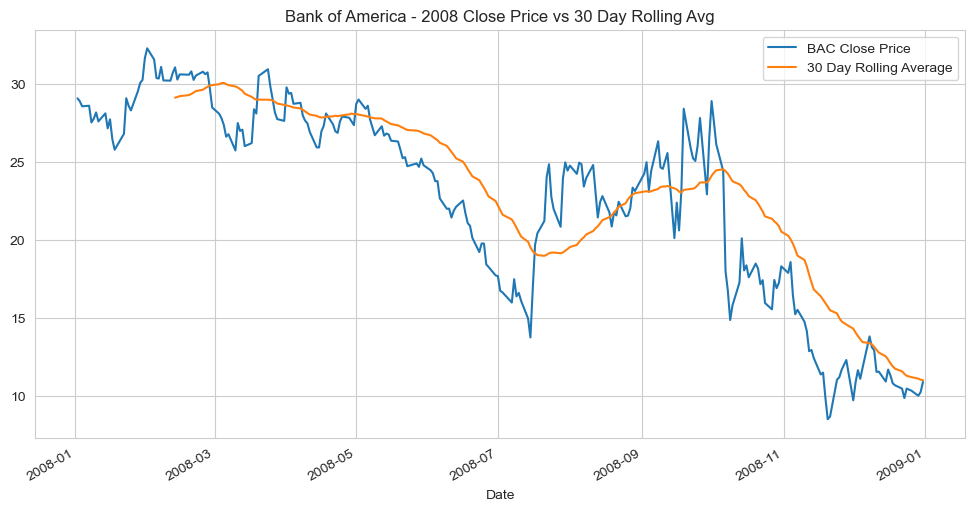

In [24]:
# Filter BAC data for the year 2008
BAC_2008 = bank_stocks['BAC'].loc['2008-01-01':'2008-12-31']

# Calculate 30-day rolling average of Close price
BAC_2008['30 Day Avg'] = BAC_2008['Close'].rolling(window=30).mean()

# Plot
plt.figure(figsize=(12,6))
BAC_2008['Close'].plot(label='BAC Close Price')
BAC_2008['30 Day Avg'].plot(label='30 Day Rolling Average')
plt.title('Bank of America - 2008 Close Price vs 30 Day Rolling Avg')
plt.legend()
plt.show()

This plot compares **Bank of America’s closing price in 2008** with the **30-day rolling average**.  
The rolling average smooths out short-term fluctuations, making the **downward trend during the crisis** clearer.

### Correlation Heatmap of Bank Closing Prices

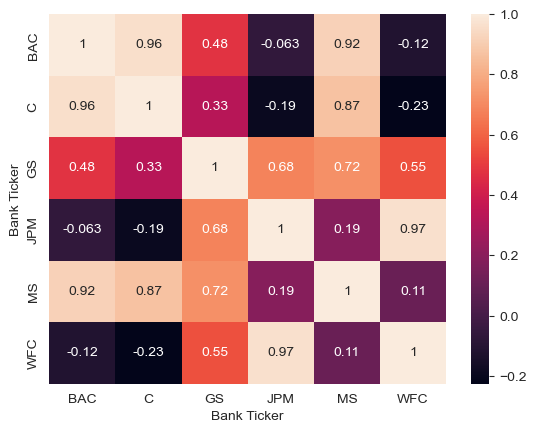

In [25]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

This heatmap shows the **correlation between the closing prices of different banks**.  
We can see very strong positive correlations (close to **1**) between banks like **BAC and C**, as well as **JPM and WFC**, while some pairs have weaker or even slightly negative correlations.

### Cluster Map of Bank Closing Price Correlations


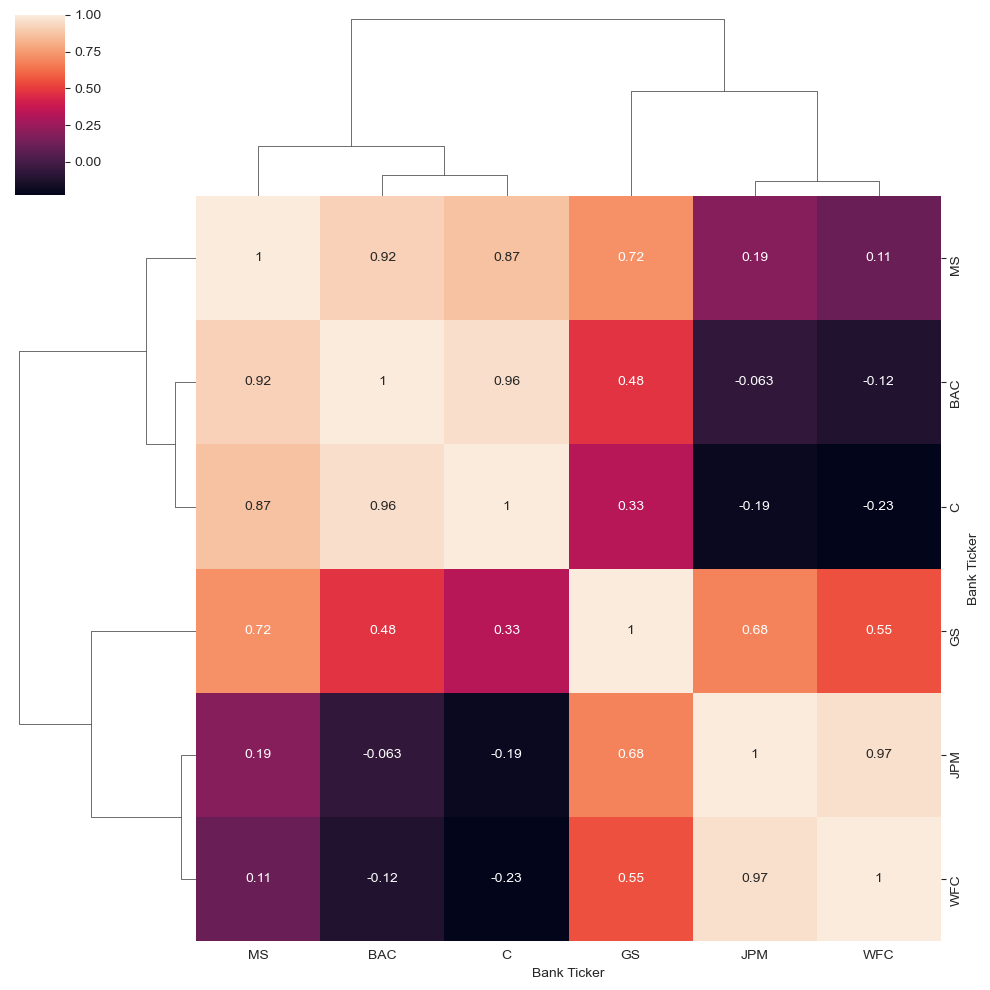

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.show()

This clustermap groups the banks based on the **similarities in their closing price correlations**.  
We can see that **JPM and WFC** form a very strong cluster (correlation close to **1**), while **BAC, C, and MS** also cluster together due to their high correlations. This visualization highlights how some banks move more closely together than others.

### Interactive Heatmap of Bank Closing Price Correlations

In [27]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

This interactive heatmap shows the **correlations between bank closing prices**.  
Darker blue indicates a stronger positive correlation (close to **1**), while red indicates weak or negative correlations.  
For example, **BAC and C** have a very high correlation (≈ **0.96**), meaning their prices tend to move together.